In [1]:
#@title
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

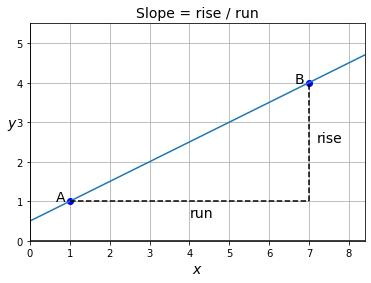

In [2]:
#@title
def get_AB_line(A_pos, B_pos, x_min=-1000, x_max=+1000):
    rise = B_pos[1] - A_pos[1]
    run = B_pos[0] - A_pos[0]
    slope = rise / run
    offset = A_pos[1] - slope * A_pos[0]
    return [x_min, x_max], [x_min * slope + offset, x_max * slope + offset]

def plot_AB_line(A_pos, B_pos, A_name="A", B_name="B"):
    for point, name in ((A_pos, A_name), (B_pos, B_name)):
        plt.plot(point[0], point[1], "bo")
        plt.text(point[0] - 0.35, point[1], name, fontsize=14)
    xs, ys = get_AB_line(A_pos, B_pos)
    plt.plot(xs, ys)

def plot_rise_over_run(A_pos, B_pos):
    plt.plot([A_pos[0], B_pos[0]], [A_pos[1], A_pos[1]], "k--")
    plt.text((A_pos[0] + B_pos[0]) / 2, A_pos[1] - 0.4, "run", fontsize=14)
    plt.plot([B_pos[0], B_pos[0]], [A_pos[1], B_pos[1]], "k--")
    plt.text(B_pos[0] + 0.2, (A_pos[1] + B_pos[1]) / 2, "rise", fontsize=14)

def show(axis="equal", ax=None, title=None, xlabel="$x$", ylabel="$y$"):
    ax = ax or plt.gca()
    ax.axis(axis)
    ax.grid()
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14, rotation=0)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

A_pos = np.array([1, 1])
B_pos = np.array([7, 4])
plot_AB_line(A_pos, B_pos)
plot_rise_over_run(A_pos, B_pos)
show([0, 8.4, 0, 5.5], title="Slope = rise / run")

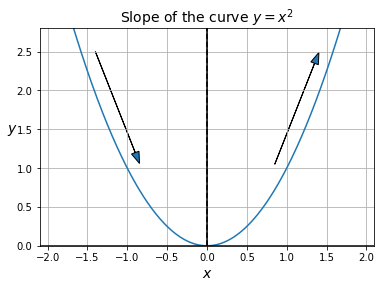

In [3]:
#@title
xs = np.linspace(-2.1, 2.1, 500)
ys = xs**2
plt.plot(xs, ys)

plt.plot([0, 0], [0, 3], "k--")
plt.arrow(-1.4, 2.5, 0.5, -1.3, head_width=0.1)
plt.arrow(0.85, 1.05, 0.5, 1.3, head_width=0.1)
show([-2.1, 2.1, 0, 2.8], title="Slope of the curve $y = x^2$")

In [4]:
#@title
def animate_AB_line(f, fp, f_str, x_A, axis=None):
    y_A = f(x_A)
    eps = 1e-4
    x_B_range = 1.5
    x_B = x_A + eps

    n_frames = 200
    text_offset_A = -0.2
    text_offset_B = +0.1
    x_min, x_max = -1000, 1000

    fig, ax = plt.subplots()

    # plot f(x)
    xs = np.linspace(-2.1, 2.1, 500)
    ys = f(xs)
    ax.plot(xs, ys)

    # plot the tangent to the curve at point A
    if fp:
        slope = fp(x_A)
        offset = y_A - slope * x_A
        ax.plot([x_min, x_max], [slope*x_min + offset, slope*x_max + offset],
                "y--")

    # plot the line AB and the labels A and B so they can be animated
    y_A = f(x_A)
    y_B = f(x_B)
    xs, ys = get_AB_line([x_A, y_A], [x_B, y_B])
    line_inf, = ax.plot(xs, ys, "-")
    line_AB, = ax.plot([x_A, x_B], [y_A, y_B], "bo-")
    ax.text(x_A + text_offset_A, y_A, "A", fontsize=14)
    B_text = ax.text(x_B + text_offset_B, y_B, "B", fontsize=14)

    # plot the grid and axis labels
    title = r"Slope of the curve $y = {}$ at $x_\mathrm{{A}} = {}$".format(f_str, x_A)
    show(axis or [-2.1, 2.1, 0, 2.8], title=title)

    def update_graph(i):
        x_B = x_A + x_B_range * np.cos(i * 2 * np.pi / n_frames) ** 3
        if np.abs(x_B - x_A) < eps:
            x_B = x_A + eps # to avoid division by 0
        y_B = f(x_B)
        xs, ys = get_AB_line([x_A, y_A], [x_B, y_B])
        line_inf.set_data(xs, ys)
        line_AB.set_data([x_A, x_B], [y_A, y_B])
        B_text.set_position([x_B + text_offset_B, y_B])
        return line_inf, line_AB

    anim = animation.FuncAnimation(fig, update_graph,
                                  init_func=lambda: update_graph(0),
                                  frames=n_frames,
                                  interval=20,
                                  blit=True)
    plt.close()
    return anim

animate_AB_line(lambda x: x**2, lambda x: 2*x, "x^2", -1)